# Comparison of Coral Bleaching estimates
## Contents
1. <a href="#intro">Introduction</a>
1. <a href="#methods">Methods</a>
1. <a href="#data">Data Sources</a>
1. <a href="#results">Results</a>
    + Data input and display of raw data
        + <a href="#HughesData">Hughes</a>
        + <a href="#LoganData">Logan</a>
        + <a href="#mapcompare">Map-based comparison of the datasets</a>
        + <a href="#matching">Matching of Hughes reef areas to Logan reef cells</a>
    + <a href="#reefbyreef">Scatterplot comparisons of Hughes and Logan reef-by-reef data</a>
    + <a href="#pca">Principal component analysis to look for variables by which to group reefs</a>
    + <a href="#variable_scatter">Scatterplot comparisons of pertinent variables</a>
    + <a href="#cumulative">Comparison of world and regional bleaching totals over time</a>
1. <a href="#refs">References</a>






<a id="intro"></a>
## Introduction

Coral reefs are under anthropogenic stress almost everywhere, and that stress continues to increase.  The most prominent effect is coral bleaching, driven by increases in SST <a href="#refs">(Frieler et al. 2013)</a>.  Understanding this complex phenomenon requires a wide range of science, including ocean circulation and climate modeling, field observations of bleaching, modeling of reef ecosytems, and laboratory work on the biology and biochemistry of corals and their symbiontic dinoflagellates.  This project addresses one small part of the question, attempting to use one set of observational data to validate a global numerical model of coral bleaching.

Observational data for coral bleaching has been collected in various ways, most prominently ReefBase and more recently in a large high-resolution database <a href="#refs">(Donner, Rickbeil, & Heron 2017)</a>.  While those databases are extensive and valuable, their data have been collected from such a diverse array of sources that their accuracy is questionable.  This has been addressed in a more recent effort which covers only 100 selected areas around the world, but does so with a more consistent approach and using more carefully vetted sources <a href="#refs">(Hughes et al. 2018)</a>.  That paper is the source of the observational data I use in this project.

Numerical models of coral reef health must make tradeoffs between ecosystem detail, coverage, predictive ability, and run time.  Because each coral region around the world has a different species assemblage, different human impacts, and different ocean conditions, it is impossible to obtain input data on a fine enough scale to model each of the world's reefs in detail.  The approach I consider here is able to model every significant coral reef area in the world.  It does that by simplifying a coral reef to two species of coral and two to four strains of symbiotic algae.  The model numerically integrates a set of differential equations in time to predict coral cover.  Bleaching is deduced from the rate of change in coral cover <a href="#refs">(Logan et al. 2018)</a>.  With these simplifications, the model is not meant to predict outcomes on specific reefs.  It is meant to be used for comparing different climate scenarios and interventions on a global basis, using the individual reefs to represent the range of SST and ocean acidification histories reefs are likely to see.

Specific inputs to the Logan model are
- SST and aragonite histories for each reef cell based on <a href="#refs">Dunne (2012)</a> and interpolated by John Dunne to our grid cells.
- growth, competition, and mortality parameters based on <a href="#refs">Baskett (2009)</a>
- I have used SST values from the RCP 6.0 climate scenario in this analysis.  This choice arbitrary since most divergence between the scenarios happens after the 2016 end data of the comparison.

Within the code and comments of this project I will use abbreviated terms to refer to these two papers and approaches.

|Paper:  |<a href="#refs">Logan et al. 2018</a> | <a href="#refs">Hughes et al. 2018</a>|
|-------|------------------|-------------------|
|Unit of reef covered: | Logan cell | Hughes area|
|or simply: | cell | area|
|count of cells/areas: | 1,925 | 100 |
|size ($km^2$): | 4120-10832 | 2-9319|
|study type: | Computational | Observational |


This project compares bleaching events as estimated in Logan cells and counted in Hughes areas.  In Hughes a severe bleaching event is declared when at least 30% of the coral surveyed is bleached.  In Logan bleaching is signaled by a 30% drop in symbiont populations or a 10% drop in coral cover.  These definitions are reasonably compatible, but other aspects of the two datasets are more difficult to deal with.  Hughes areas are unevenly distributed around the world, and their areas are given but not their shapes.  When treating Hughes areas as circles what a radius calculated from the given area, twenty one of the Hughes areas do not overlap a Logan cell, and only 143 (less than 10%) of the Logan cells overlap a Hughes area.

Even with complete overlap between cells and areas, a reef-by-reef comparision would not be exact, due to the simplifications and assumptions described earlier.  My goal is only to see how much correlation there is, both reef-by-reef and regionally, between the two datasets.  This will help guide future efforts to calibrate the numerical model.

<a id="methods"></a>
## Methods
This analysis looks at the Hughes et al. observational data and <a href="#refs">Logan et al. (2018)</a> model data in several ways.  Some proved less productive than others, but they are still included to demonstrate what was tried.

The first part of the analysis simply looks at the <a href="#mapcompare">two datasets on maps of the world</a>, as a tool for understanding what is there.  The <a href="#matching">cells and areas are matched</a>, and Logan cells are assigned to regions of the world, chosen based on the approach in <a href="#refs">Hughes et al. 2018</a>.

In order to see if there is a correlation between bleaching event counts in the two datasets, the matched cells and areas are <a href="#reefbyreef">scatterplotted</a> against each other.  The idea is that while exact matches are not expected, there should be an overall correlation between high-bleaching and low-bleaching locations.  The initial global comparison showed little to no correlation, so regional comparisons were tried, but still there was nothing.

With the idea that the uncorrelated scatter plots might be hiding correlations which would apply to subsets of the data, I tried a <a href="#pca">principal component analysis</a> looking at key variables SST, SST variance, longitude, and absolute value of latitude.  Longitude was then removed because even though it affected the results there was no biological meaning to the numerical values.  Although this analysis was interesting, with only few variables to consider I wasn't able to further simplifly the problem.

Since the PCA analysis was not helpful I tried simply <a href="#variable_scatter">plotting the variables against each other</a>.  This time there were definite trends, but most of them were fairly obvious, such as showing that SST is lower and more variable at higher latitudes.

All of the previous analyses which considered bleaching events looked at the total number of events between 1980 and 2016, the years included in Hughes et al. 2018.  One final approach was to look at <a href="#cumulative">cumulative bleaching</a> on a year-by-year basis.  This made it possible to look at trends over time.

<a id="data"></a>
## Data Sources
The research which created input data for this project was described in the introduction.  Specific inputs are
1. From Hughes et al. (2018), their supplementary Table S1, a 5-page table with 349 references.  The document is doc/Hughes_et al._2018 Science-Anthropocene bleaching patterns_SM.pdf.  The data used as input has been hand-corrected and placed in data/Hughes100Reefs.xlsx
1. For Logan et al. (2018), input file data/ESM2M_SSTR_JD.mat contains the latitude and longitude of the centroid of each Logan cell, as well as a monthly simulated SST history for that cell from 1861 to 2100 (Dunne et al. 2012).
1. data/HughesCompEvents_selV_rcp60E=1OA=1.mat is a MATLAB data file with bleaching counts from a custom run of the Logan et al. model, with counts of bleaching events in the Hughes time frame of 1980 to 2016.

The Logan data is unpublished, and so should not be used publicly before the release of Logan et al. (2018).

## Dependencies
This project runs in the Jupyter Notebook using the python language.  It has several other code dependencies.

### Publicly available libraries
- cartopy.crs
- cartopy.mpl.ticker
- copy
- math
- matplotlib.pyplot
- numpy
- pandas
- scipy.io
- scipy.linalg
- scipy.spatial
- scipy.stats
- sys

### My code stored in .py files
- Functions in principal_component.py
    - pca
- Functions in coral_project_functions.py
    - make_coral_map
    - bleach_scatter
    - scatter_all
    - bleach_annual_plot
    - cumulativesum
    


<a id="results"></a>
## Results
The bulk of the notebook follows, starting with data input and then showing the code and results for each analysis step.  These are in the same order as listed in the methods section.

In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import cartopy.crs as ccrs

from coral_project_functions import make_coral_map

# Read observational data from the Hughes supplemental material.  The first
# sheet is a cut-and-paste from their document with obvious typos
# fixed by hand and a few columns added for easier data manipulation.
# The second sheet is a copy arranged for easier import.
filename = '../data/Hughes100Reefs.xlsx' 
hughes = pd.read_excel(filename,header=0,sheet_name=1, na_values='-')
# A few missing size values import as NaN - be careful how they are used later!

<a id="HughesData"></a>
### Columns from Hughes et al. are
1. Hughes Reef - the index used in their data, 1-100.
2. Region - my code for their region labels.
    + AuA - Australasia
    + IO-ME - Indian Ocean/ Middle East
    + Pac - Pacific
    + WAtl - West Atlantic
3. Location - their location name for each reef. 
4. Numeric Lat - decimal values between about -35 and +35
5. Numeric Lon - decimal values between -180 and +180
6. Size_km2 - area in square kilometers, sometimes omitted.
7. Year - columns 7 to 43 - one column for each year of data, 1980 to 2016.  Values are blank, S, or M.
44. Severe count - the count of the number of cells in this row with the entry "S". values 0-7
45. Moderate count - the count of the number of cells in this row with the entry "M".  Values 0-12

In [21]:
# Now read our numerical model data for reef cell locations.
import scipy.io as sio

# Reference for all data for the 1,925 reef cell model.
# This has not been submitted to a journal yet, so all is subject to change:
#
# Logan, C. A., Dunne, J. P., Ryan, J. S., Baskett, M. L. & Donner, S. D. Can symbiont
# diversity and evolution allow corals to keep pace with global warming
# and ocean acidification? prep (2018).

# A copy of the data is in this repository.  The reference copy is in
# my Coral-Model-Data repository in the ProjectionsPaper directory.
mat_data = sio.loadmat('../data/ESM2M_SSTR_JD.mat')
# Put just the lat/lon columns into a data frame.  Note that they are stored
# with longitude first in the incoming data.
cells = pd.DataFrame(mat_data['ESM2M_reefs_JD'], columns=['Lon', 'Lat'])

# The same mat file has SST data, used later in the PCA section.
sst = mat_data['SSTR_2M26_JD']
cells['SST'] = np.mean(sst, axis=1)
cells['variance'] = np.var(sst, axis=1)

del sst  # big, and no longer needed (though the value of del is debated online)

# Next, read the model bleaching counts from a MATLAB mat file written for this purpose.
mat_data = sio.loadmat('../data/HughesCompEvents_selV_rcp60E=1OA=1.mat')
# Put the bleaching counts into a data frame.  These counts are the total for each
# reef during 1980 to 2016.
modelBleaching = pd.DataFrame(mat_data['events80_2016'])
modelBleaching.rename(columns={0: 'Events'}, inplace=True)
# Be we really want this in the cells dataframe
cells['Events'] = modelBleaching['Events']

# For later use, also load the un-summarized data which has the bleaching
# flags for each reef and year from 1980 to 2016.  Branching and massive coral
# are treated separately.
massive_bleach = np.array(mat_data['events80_2016_detail'][:, :, 0])
branching_bleach = np.array(mat_data['events80_2016_detail'][:, :, 1])

del mat_data
del modelBleaching
cells.head()

,Lon,Lat,SST,variance,Events
0,-179.5,-19.145246,26.051836,2.952026,2
1,-179.5,-18.311912,26.373503,2.654303,2
2,-179.5,-17.500333,26.622993,2.420091,2
3,-179.5,-16.710136,26.928833,2.224938,1
4,-179.5,-15.940584,27.229943,1.902959,1


<a id="LoganData"></a>
### Columns from the Logan et al. data are
For each cell:
1. Lat - the latitude of the centroid
1. Lon - the longitude of the centroid
1. SST - mean monthly SST from 1980 to 2016
1. variance - variance of monthly SST from 1980 to 2016
1. Events - the number of bleaching events between 1980 and 2016, inclusive

<IPython.core.display.Javascript object>


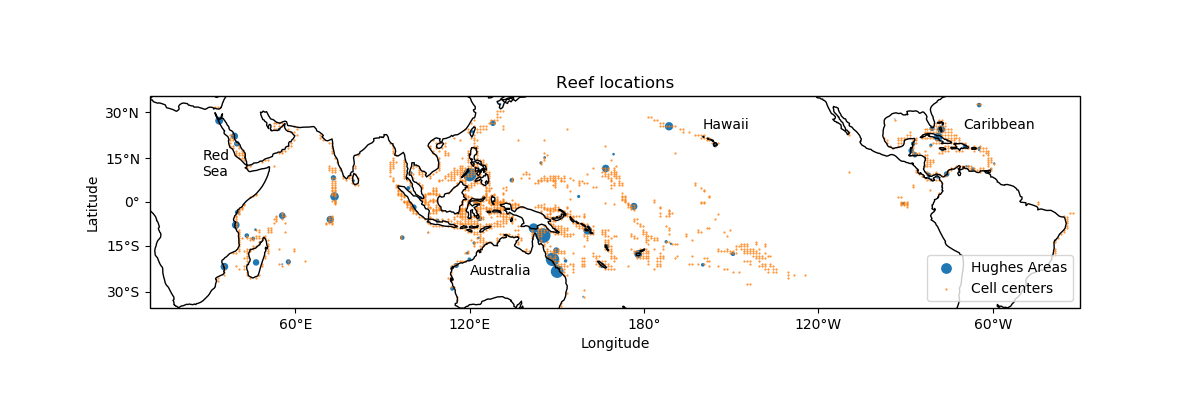

Area size min/max/mean/median: 2.0 9319.0 945.1030927835052 343.0 km^2


In [22]:
plt.figure(figsize=[12, 4])
ax = make_coral_map()

# Hughes reef areas can be large, so make marker size proportional.  Conveniently, the marker
# size argument is in square units.  However, our map is in degree units and the areas
# are in kilometers.  This is a rough conversion relating pixels to square degrees.  I have doubled
# the original value to make the markers easier to see.
conversion = 120*(1/111)**2
area_sizes = hughes.Size_km2.astype(float)
# Do some stats with no NaN values
sss = area_sizes[~np.isnan(area_sizes)]
print("Area size min/max/mean/median:", min(sss), max(sss), np.mean(sss), np.median(sss), 'km^2')

lon = hughes['Numeric Lon']
plt.scatter(lon-180*(np.sign(lon)-1), hughes['Numeric Lat'], marker='o',
            s=conversion*area_sizes,
            label='Hughes Areas', transform=ccrs.PlateCarree())
# Mark our cells with small dots.
lon = cells['Lon']
plt.scatter(lon-180*(np.sign(lon)-1), cells['Lat'], marker='.', s=1, label='Cell centers',
           transform=ccrs.PlateCarree())
plt.title('Reef locations')
plt.legend()
plt.text(110, 25, 'Caribbean')
plt.text(-60, -25, 'Australia')
plt.text(-152, 9, 'Red\nSea')
plt.text(20, 25, 'Hawaii');

<IPython.core.display.Javascript object>


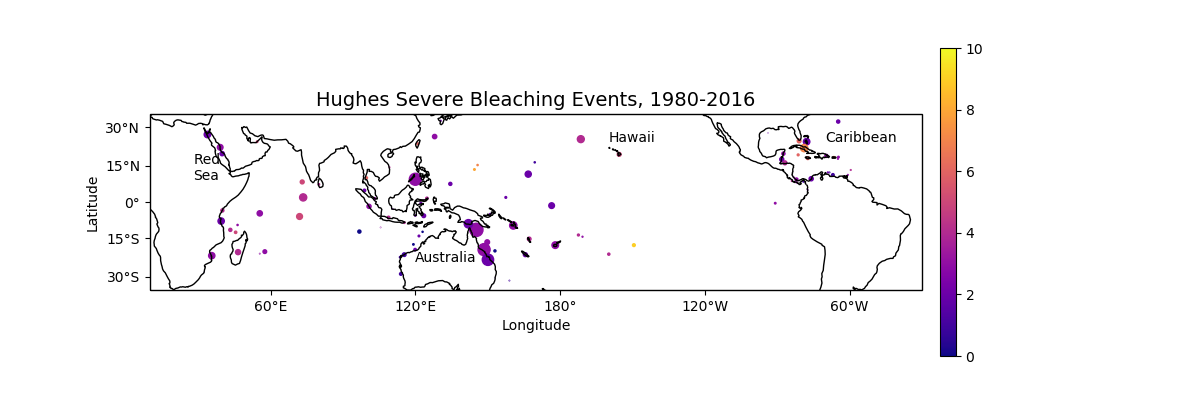

In [23]:
# Now plot Hughes locations colored by the number of severe bleaching events.
plt.figure(figsize=[12, 4])
ax = make_coral_map()
lon = hughes['Numeric Lon']
severity = hughes['Severe count']
plt.scatter(lon-180*(np.sign(lon)-1), hughes['Numeric Lat'], marker='o', 
            s=conversion*area_sizes,
            label='Hughes Areas',
            c=severity,
            cmap="plasma",
            transform=ccrs.PlateCarree())

plt.title('Hughes Severe Bleaching Events, 1980-2016', fontsize=14)
plt.clim(0, 10)
plt.colorbar(pad=0.02)
plt.text(110, 25, 'Caribbean')
plt.text(-60, -25, 'Australia')
plt.text(-152, 9, 'Red\nSea')
plt.text(20, 25, 'Hawaii');

<IPython.core.display.Javascript object>


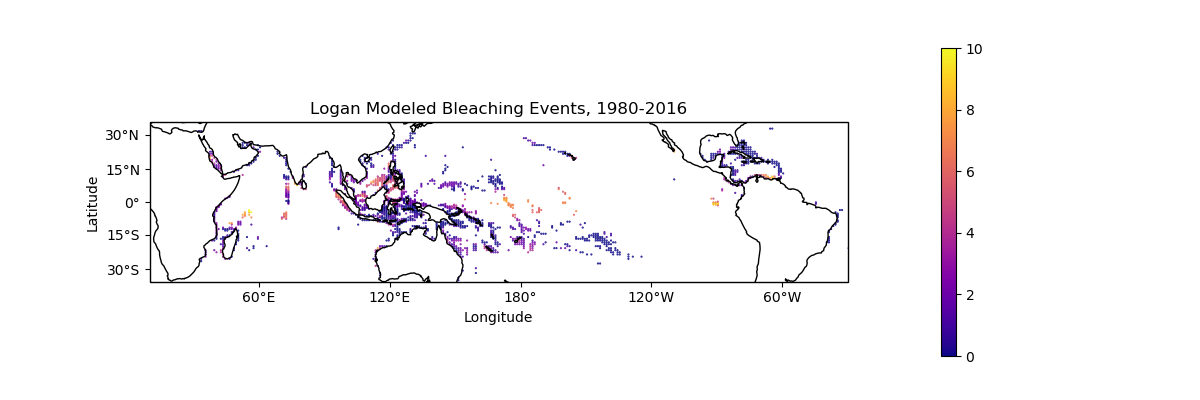

In [24]:
# Look at Bleaching events from the numerical model, using the same scale as
# the previous plot of Hughes data.
plt.figure(figsize=[12, 4])
ax = make_coral_map()

lon = cells['Lon']
plt.scatter(lon-180*(np.sign(lon)-1), cells['Lat'], c = cells['Events'],
            marker='.', s=1, label='Events', cmap="plasma",
            transform=ccrs.PlateCarree())
plt.title('Logan Modeled Bleaching Events, 1980-2016')
plt.clim(0, 10)
plt.colorbar(pad=0.10);

In [25]:
hughes.head()

,Hughes Reef,Region,Location,Numeric Lat,Numeric Lon,Size_km2,1980,1981,1982,1983,...,2009,2010,2011,2012,2013,2014,2015,2016,Severe count,Moderate count
0,1,AuA,"Australia, Coral Sea Northern",-16.5,149.8,1165.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,3,1
1,2,AuA,"Australia, Coral Sea Southern",-20.0,153.0,231.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,0,1
2,3,AuA,"Australia, GBR Central",-19.5,148.5,7735.0,M,NaN,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,3,5
3,4,AuA,"Australia, GBR Northern",-11.5,145.3,9319.0,M,NaN,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,3,2
4,5,AuA,"Australia, GBR Southern",-23.5,150.1,6872.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,2,2


<a id="matching"></a>
### Matching Hughes areas to Logan reef cells
To make a fair comparison, we need to figure out which of our cells match Hughes reef areas.  Each area has a center and an area, so we can use a circle of that area as a first-order guess.  Unfortunately, it seems that the areas are actually far from circular, because some of the centers are far inland.

The code below uses a scipy tool to find spatial matches between the two sets of data.  The matches found here can be considered close matches, because the cells must overlap, or nearly so.

In [26]:
# Use scipy.spatial.cKDTree to find neighbors.
from scipy import spatial
# Build the tree (a binary trie) of our cells.
# NOTE: cells.as_matrix({'Lon', 'Lat'}) does not return the columns in a determinate order!
# explicitly stack the columns instead.
lonlat = np.column_stack((cells['Lon'], cells['Lat']))
tree = spatial.cKDTree(lonlat)

# For each of the 100 Hughes cells, get a list of our cells which are likely to overlap.
# These will be used
hughes = hughes.assign(radius_km=hughes.Size_km2**0.5)
cell_lists = [[] for i in range(len(hughes))]
match_idx = np.zeros(len(hughes), dtype=np.bool)
for i in range(len(hughes)):
    # convert radius to degrees (ignoring change of size with latitude for now)
    # also, add 0.5 degrees as a rough allowance for our cell size
    radius = 0.5 + hughes.radius_km[i] / 111
    c = tree.query_ball_point([hughes['Numeric Lon'][i], hughes['Numeric Lat'][i]],
                              radius, n_jobs=2)
    # Convert zero-based indexes to 1-based cell numbers.
    cell_lists[i] = [x+1 for x in c]
    match_idx[i] = len(c) > 0

print("For each Hughes area, overlapping Logan cells are listed:")
print(cell_lists)

For each Hughes area, overlapping Logan cells are listed:
[[1601, 1602, 1624], [], [1597, 1578, 1560, 1579, 1598], [1513, 1512, 1528], [], [991], [1738], [], [961], [], [], [1679], [], [1496], [], [994, 993], [1198, 1197], [915], [935], [1267, 1268], [1093, 1126], [1232, 1233], [813, 812, 814], [], [1357, 1342], [831], [1630, 1631, 1652], [1107, 1108, 1136, 1135, 1137], [1759, 1758, 1766], [], [807, 808], [], [1181, 1225], [851], [762, 763], [1086], [1147, 1148], [656, 665, 657, 666], [553], [], [680, 706], [516, 517], [], [], [695, 696, 697], [636, 635], [565, 566], [476, 477], [502], [487, 488], [624, 625], [572], [], [], [492, 493, 494], [], [71], [], [1540], [103], [275], [], [1906, 1912, 1913], [144], [240, 241, 239], [1525, 1524], [126], [70, 73], [], [1903, 1904], [], [1785, 1786], [1457, 1458], [], [], [1811, 1810, 1827, 1828], [57], [1798, 1818], [342, 331, 343], [445], [258], [422], [402], [420], [301], [348], [], [329], [398, 402], [399], [311, 304], [224], [256, 265, 266], 

<a id="mapcompare"></a>
### Comparison of beaching in each area
Now that areas and cells are associated, we can store nearby Logan bleaching values in the Hughes dataframe and use that to plot a comparison.

<IPython.core.display.Javascript object>


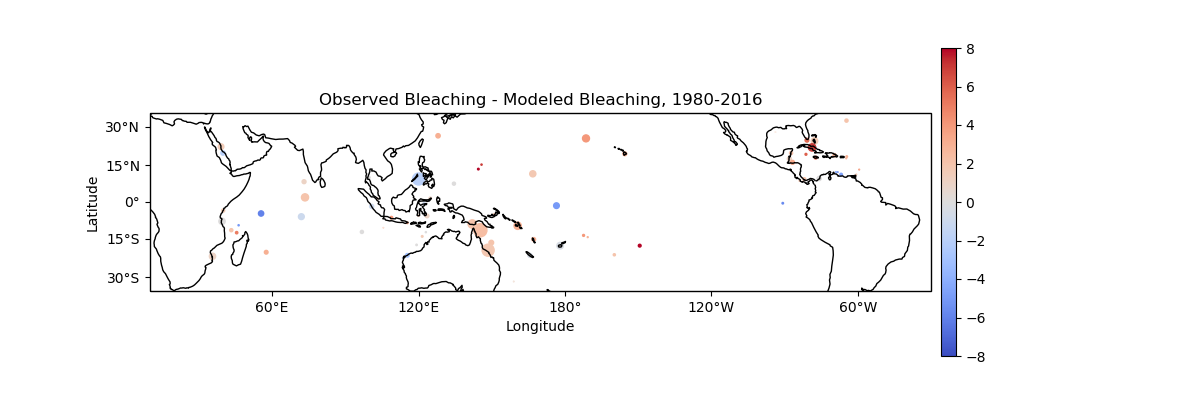

There are 76 areas with comparisons.


In [27]:
# Now that we have a correspondence between Hughes areas and Logan cells, we can
# compare the bleaching for those which have some overlap.
# Add a column for cell-based bleaching values
hughes = hughes.assign(cell_bleach=np.zeros(len(hughes)))
# For each observational area, add the average bleaching count from all associated model cells.
for i in range(len(hughes)):
    if len(cell_lists[i]) > 0:
        count = 0;
        for n in cell_lists[i]:
            # "n-1" because cells are 1-based and modelBleaching is 0-based
            count = count + cells.loc[n-1, 'Events']
        hughes.loc[i, 'cell_bleach'] = count / len(cell_lists[i])
        
# Plot the Hughes reefs, but only those which have Logan cells to compare to.
# Color the markers by the difference between the two bleaching values.
plt.figure(figsize=[12, 4])
ax = make_coral_map()

conversion = 120*(1/111)**2
lon = hughes[match_idx]['Numeric Lon']

print("There are", len(lon), "areas with comparisons.")
severity = hughes[match_idx]['Severe count'] - hughes[match_idx]['cell_bleach']

plt.scatter(lon, hughes[match_idx]['Numeric Lat'], marker='o', 
            s=conversion*hughes[match_idx].Size_km2.astype(float),
            label='Hughes Areas',
            c=severity,
            cmap='coolwarm',
            transform=ccrs.PlateCarree())

plt.title('Observed Bleaching - Modeled Bleaching, 1980-2016')
plt.clim(-8, 8)
plt.colorbar(pad=0.01);

### Assigning every cell a Hughes region
While not every area closely matches a cell and vice versa, it is reasonable to assign all Logan cells to some Hughes area of the world.  This is done by matching each cell to a nearby area, where the definition of "nearby" is relaxed until all cells have been matched.

There are two things to note here.  First, while most reef cells fall near an area treated by Hughes, Hughes has no areas on the Atlantic coast of Brazil.  Those are assigned to the "West Atlantic" region, but they are likely to be ecologically quite different than the original Hughes "West Atlantic" areas, which are in the Caribbean and Gulf of Mexico, or north toward the Bahamas and Bermuda.  Second, some reef are reassigned manually because their proximity to the isthmus of Panama led to poor results with the automatic method.

Also, Hughes has no areas in the Solomon Islands or the Bismarck Sea N.E. of New Guinea.  It is not clear whether they are a better match to the Pacific or Australasian regions.  I have left these as matched automatically, except for a small group which are clearly Micronesian and one cell which may be Nauru.  These have been assigned to the Pacific region.

In [28]:
# Add a new column for storing region assignments.
cells = cells.assign(Region='none')
# Use the same tree/trie to find the closest matches.
cells_assigned = 0
# start with the this radius added to the area's radius.
r = 0.5
while cells_assigned < 1925:
    for i in range(len(hughes)):
        radius = r + hughes.radius_km[i] / 111
        c = tree.query_ball_point([hughes['Numeric Lon'][i], hughes['Numeric Lat'][i]],
                                  radius, n_jobs=-1)
        region = hughes.Region[i]
        #print('Reef', i, 'region', region, 'found ', c)
        for x in c:
            if cells.loc[x, 'Region'] == 'none':
                cells.loc[x, 'Region'] = region
                cells_assigned = cells_assigned + 1
    print('After r =', r, ',', cells_assigned, 'are assigned.')
    # Look twice as far away on the next pass.
    r = r * 2

# Some special cases are mis-identified with the approach above.
# South atlantic, off Brazil is initially id'd as Indian Ocean/ Middle East!
# Make a bounding box to specify these cells
box = [-40, -25, -26, -16]  # Lon, Lon, Lat, Lat 
cells.loc[(cells.Lat > box[2]) & (cells.Lat < box[3]) & (cells.Lon > box[0]) &
          (cells.Lon < box[1]), 'Region'] = "WAtl"
# Others off Brazil are labeled Pacific.
box = [-39, -34, -16, -8]
cells.loc[(cells.Lat > box[2]) & (cells.Lat < box[3]) & (cells.Lon > box[0]) &
          (cells.Lon < box[1]), 'Region'] = "WAtl"
# Some SW Caribbean cells are id'd as Pacific
#11.6, -83.7
#box = [-83, -80,  12, 16]
box = [-83.8, -80,  11.5, 16]
cells.loc[(cells.Lat > box[2]) & (cells.Lat < box[3]) & (cells.Lon > box[0]) &
          (cells.Lon < box[1]), 'Region'] = "WAtl"
box = [-81, -76, 8.8, 11]
cells.loc[(cells.Lat > box[2]) & (cells.Lat < box[3]) & (cells.Lon > box[0]) &
          (cells.Lon < box[1]), 'Region'] = "WAtl"
# A few micronesian cells are closer to a Hughes area sound of New Guinea than to micronesian
# areas, but they clearly belong with micronesia
box = [147, 153, 4, 11]
cells.loc[(cells.Lat > box[2]) & (cells.Lat < box[3]) & (cells.Lon > box[0]) &
          (cells.Lon < box[1]), 'Region'] = "Pac"
# Nauru?
box = [164, 169, -1, 3]
cells.loc[(cells.Lat > box[2]) & (cells.Lat < box[3]) & (cells.Lon > box[0]) &
          (cells.Lon < box[1]), 'Region'] = "Pac"

print('Pacific:', sum(cells['Region'] == 'Pac'))
print('Indian Ocean - Middle East:', sum(cells['Region'] == 'IO-ME'))
print('Australasia:', sum(cells['Region'] == 'AuA'))
print('West Atlantic:', sum(cells['Region'] == 'WAtl'))
print()

# Save the cells with region labels for use in another notebook.  This is
# only used in Reef_PCA_Scatterplots.
cells.to_pickle('../results/Logan_cells_events_region.pkl')
cells.head() 

After r = 0.5 , 142 are assigned.
After r = 1.0 , 305 are assigned.
After r = 2.0 , 623 are assigned.
After r = 4.0 , 1192 are assigned.
After r = 8.0 , 1753 are assigned.
After r = 16.0 , 1886 are assigned.
After r = 32.0 , 1910 are assigned.
After r = 64.0 , 1925 are assigned.
Pacific: 466
Indian Ocean - Middle East: 301
Australasia: 937
West Atlantic: 221



,Lon,Lat,SST,variance,Events,Region
0,-179.5,-19.145246,26.051836,2.952026,2,Pac
1,-179.5,-18.311912,26.373503,2.654303,2,Pac
2,-179.5,-17.500333,26.622993,2.420091,2,Pac
3,-179.5,-16.710136,26.928833,2.224938,1,Pac
4,-179.5,-15.940584,27.229943,1.902959,1,Pac


<IPython.core.display.Javascript object>


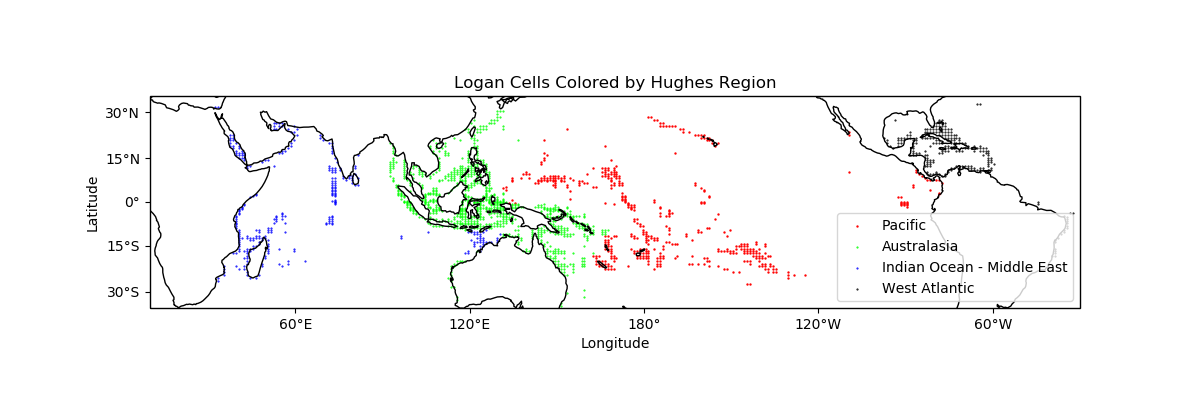

In [29]:
# Plot the Logan cells colored by region to check the assignments.
# First give each region a number for easy use of a color map.
cells = cells.assign(RegionFlag='0')
cells.loc[cells.Region=='Pac', 'RegionFlag'] = 1;
cells.loc[cells.Region=='AuA', 'RegionFlag'] = 2;
cells.loc[cells.Region=='IO-ME', 'RegionFlag'] = 3;
cells.loc[cells.Region=='WAtl', 'RegionFlag'] = 4;

plt.figure(figsize=[12, 4])
ax = make_coral_map()
lon = cells[cells.RegionFlag==1]['Lon']
plt.scatter(lon-180*(np.sign(lon)-1), cells[cells.RegionFlag==1]['Lat'], c = [1.0, 0, 0],
            marker='.', s=2, label='Pacific', cmap="Dark2",
            transform=ccrs.PlateCarree())
lon = cells[cells.RegionFlag==2]['Lon']
plt.scatter(lon-180*(np.sign(lon)-1), cells[cells.RegionFlag==2]['Lat'], c = [0, 1.0, 0],
            marker='.', s=1, label='Australasia', cmap="Dark2",
            transform=ccrs.PlateCarree())
lon = cells[cells.RegionFlag==3]['Lon']
plt.scatter(lon-180*(np.sign(lon)-1), cells[cells.RegionFlag==3]['Lat'], c = [0, 0, 1.0],
            marker='.', s=1, label='Indian Ocean - Middle East', cmap="Dark2",
            transform=ccrs.PlateCarree())
lon = cells[cells.RegionFlag==4]['Lon']
plt.scatter(lon-180*(np.sign(lon)-1), cells[cells.RegionFlag==4]['Lat'], c = [0, 0, 0],
            marker='.', s=1, label='West Atlantic', cmap="Dark2",
            transform=ccrs.PlateCarree())
plt.title('Logan Cells Colored by Hughes Region')
plt.legend(loc=0);

<a id="reefbyreef"></a>
### Reef-by-reef bleaching correlation
The initial comparison between Hughes areas and Logan reefs doesn't look great.  Try a scatterplot for all of the Hughes areas to see if there's at least some trend.  This is first done for the world, and then for each region separately.

<IPython.core.display.Javascript object>


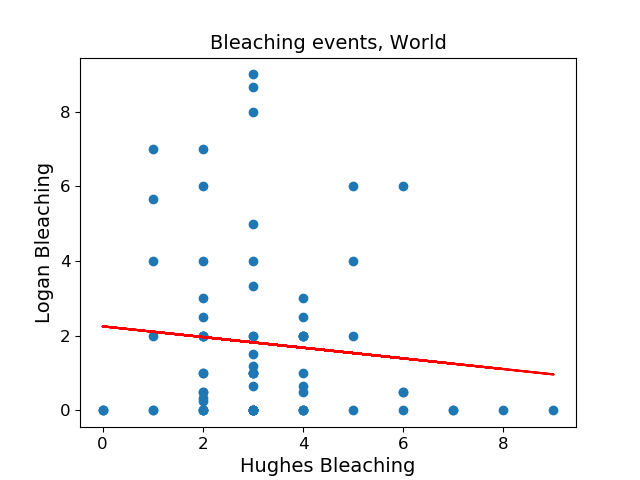

World r-squared: 0.011


In [30]:
from coral_project_functions import bleach_scatter

h_match = hughes[match_idx]   
plt.figure()
bleach_scatter(hughes[match_idx], 'World')

<IPython.core.display.Javascript object>


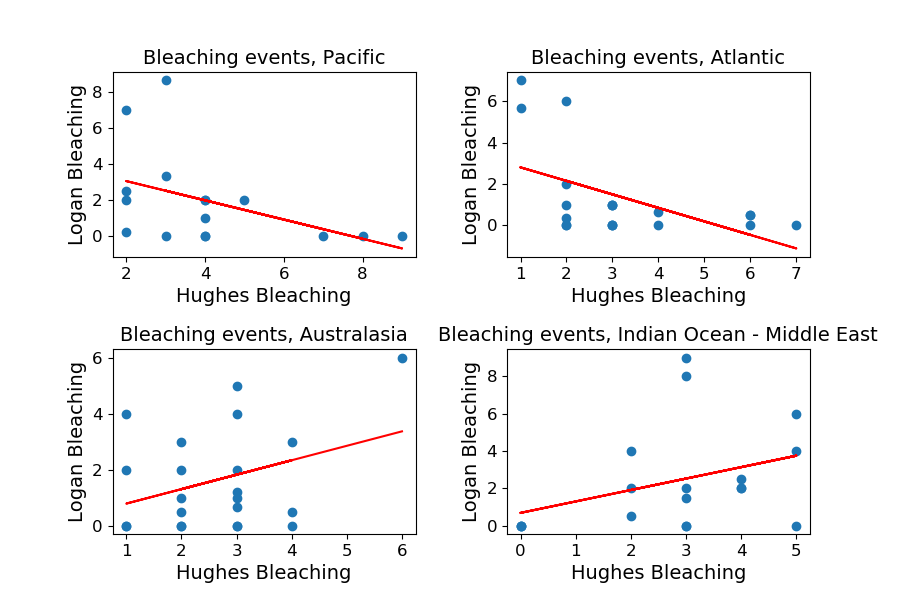

Pacific r-squared: 0.201
Atlantic r-squared: 0.271
Australasia r-squared: 0.120
Indian Ocean - Middle East r-squared: 0.126


In [31]:
# See if the correlation is better regionally.
plt.figure(figsize=[9, 6])
plt.subplot(2,2,1)
h_match_region = h_match[h_match['Region'] == 'Pac']
bleach_scatter(h_match_region, 'Pacific')
plt.subplot(2,2,2)
h_match_region = h_match[h_match['Region'] == 'WAtl']
bleach_scatter(h_match_region, 'Atlantic')
plt.subplot(2,2,3)
h_match_region = h_match[h_match['Region'] == 'AuA']
bleach_scatter(h_match_region, 'Australasia')
plt.subplot(2,2,4)
h_match_region = h_match[h_match['Region'] == 'IO-ME']
bleach_scatter(h_match_region, 'Indian Ocean - Middle East')
plt.subplots_adjust(hspace=0.5, wspace=0.3)


#### Outlier notes
The two Pacific outlying locations are in the Galapagos and Kiribati, to use their Hughes names.  
The Galapagos has a land area of around 7000 $km^2$ and Hughes has a reef area of 126 $km^2$.
Kiribati has a land area of 800 $km^2$ (wikipedia) and Hughes has a reef area of 1718 $km^2$.
While Kiribati is closer to the Galapagos than most Pacific islands and they are both
equatorial, they are quite far apart (over 90 deg longitude) and there is little reason
to group them.

The three Atlantic outlying locations are Bonaire, Curacao, and Venezuela, to use their Hughes names.  
Curacao has a land area of 444 $km^2$ (Wikipedia) and Hughes has a reef area of 47 $km^2$.
Bonaire has a land area of 295 $km^2$ (wikipedia) and Hughes has a reef area of 22 $km^2$.
Venezuela is continental, and the Hughes are is 349 $km^2$, perhaps corresponding to the Gran Roque reef east of Bonaire.
It is interesting that these outliers are adjacent, and have low bleaching according to Hughes and higher bleaching in our model.
Repeating the plot with these three locations removed only decreases the $R^2$ value, and the slope is still negative.

### Another subset approach - by size
Plot this same comparison using only the smallest and only the largest reef areas, based on Hughes


<IPython.core.display.Javascript object>


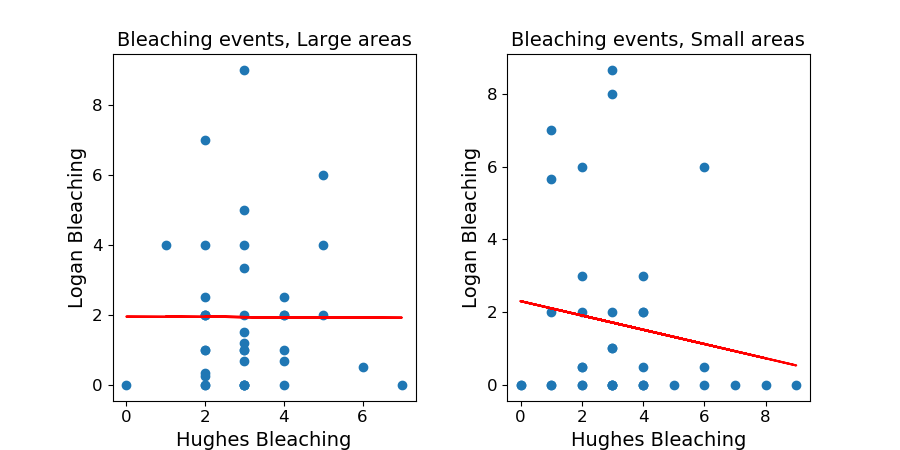

Large areas r-squared: 0.000
Small areas r-squared: 0.026


In [32]:
median_area = np.median(h_match['Size_km2'])
h_match_big = h_match[h_match['Size_km2'] >= median_area]
h_match_small = h_match[h_match['Size_km2'] < median_area]

plt.figure(figsize=[9, 4.5])
# Biggest half
plt.subplot(1,2,1)
bleach_scatter(h_match_big, 'Large areas')

# Smallest half
plt.subplot(1,2,2)
bleach_scatter(h_match_small, 'Small areas')
plt.subplots_adjust(hspace=0.4, wspace=0.3)


<a id="pca"></a>
### Principal Components Analysis
Given that the scatter plots don't show relationships at the global or regional level, perhaps PCA can reveal some grouping by temperature, temperature variability, or longitude which will turn up something interesting.

In [33]:
# As a numerical value, the absolute value of latitude is more likely to be useful than the
# signed value.
cells['abs_lat'] = abs(cells['Lat'])

all_names = list(cells)
all_names

['Lon', 'Lat', 'SST', 'variance', 'Events', 'Region', 'RegionFlag', 'abs_lat']

In [34]:
import copy
# function moved so this project is self-contained:
import principal_component as pc

# Longitude does have a relationship with bleaching, but it's more categorical
# than scalar, so omit it.  Also omit signed Latitude.  Remove Region, because it is
# categorical and we hope to find a better grouping.
print('PCA including only unsigned latitude:')
print('all names:', all_names)
# Without deepcopy, removing names from the list affects the original.
reduced_names = copy.deepcopy(all_names)
reduced_names.remove('Lat')
reduced_names.remove('Lon')
reduced_names.remove('Region')
reduced_names.remove('RegionFlag')
reduced_names.remove('Events')

[eigenval, eigenvec, pct_acct, loadings, sorted_names] = pc.pca(np.asmatrix(cells[reduced_names]),
     reduced_names, standardize=True, sort=True)
print('Names:    ', sorted_names)
print('Eigenvalues:\n', eigenval)
print('Eigenvectors:\n', eigenvec)
print('Variance accounted for by each component:\n', pct_acct)
#print('Component loadings:\n', loadings)

PCA including only unsigned latitude:
all names: ['Lon', 'Lat', 'SST', 'variance', 'Events', 'Region', 'RegionFlag', 'abs_lat']
Names:     ['SST' 'abs_lat' 'variance']
Eigenvalues:
 [2.33160811 0.43911775 0.22927415]
Eigenvectors:
 [[-0.58472751  0.64081895 -0.49743824]
 [ 0.59956931  0.75443309  0.26710925]
 [ 0.54645254 -0.14206258 -0.82535316]]
Variance accounted for by each component:
 [77.72027019 14.63725817  7.64247164]


<IPython.core.display.Javascript object>


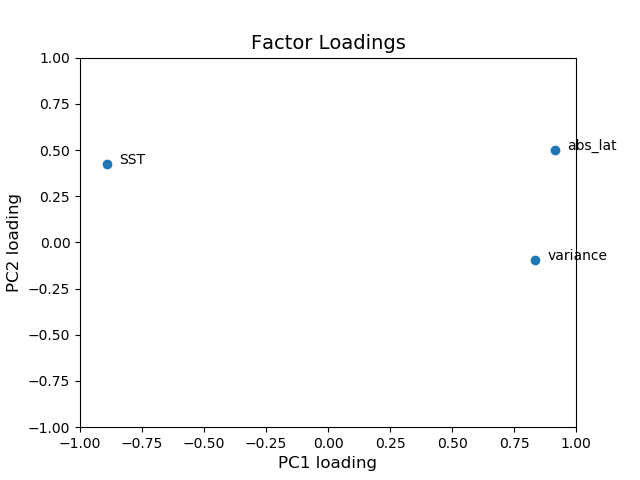

array(['SST', 'abs_lat', 'variance'], dtype='<U8')

In [35]:
# Now look at factor loadings for the reduced list
# A = V (sqrt(Lambda))
# V = eigenvectors = eigenvec
# Lambda = eigenvalue matrix = eigenval
A = np.matmul(eigenvec, np.diag(eigenval)**0.5)
# A now contains the loadings for PC1 in the first row, and so on.
A
plt.figure()
plt.plot(A[:, 0], A[:, 1], 'o')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('PC1 loading', fontsize=12)
plt.ylabel('PC2 loading', fontsize=12)
plt.title('Factor Loadings', fontsize=14)
for i, txt in enumerate(sorted_names):
    plt.text(A[i,0]+0.05,A[i,1],txt)
sorted_names

#### Elimination of PCA
Since there are so few variables, PCA was not likely to be useful here, but I have included it because it was interesting as a way of thinking through the possible contribution of each  variable.  The plot above does not seem to reveal anything useful.

<a id="variable_scatter"></a>
### Looking at scatter plots for Hughes/Logan correlation
Since Principal Components Analysis did not seem helpful here, I tried simply plotting each variable against the others.  Plots for all reefs are shown below, and versions for each region separately are in another notebook.  [Reef_PCA_Scatterplots](Reef_PCA_Scatterplots.ipynb)

<IPython.core.display.Javascript object>


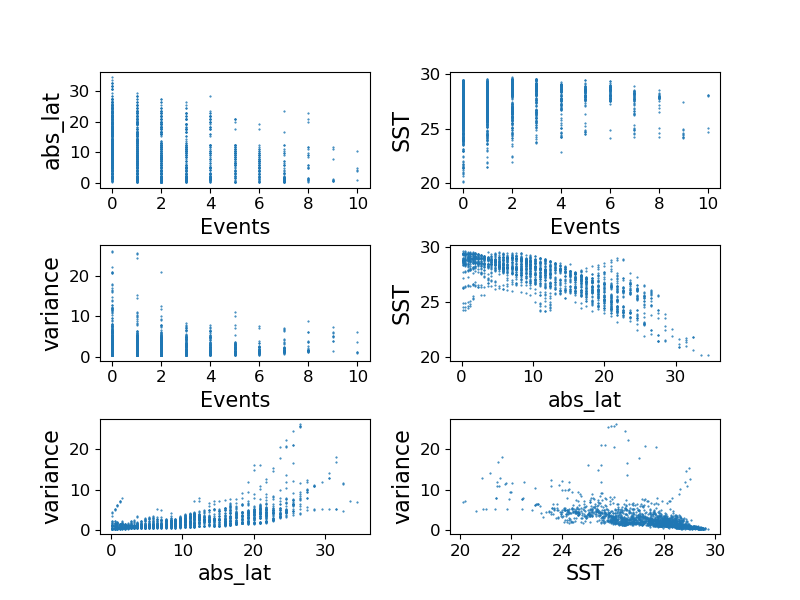

Plotting 4 variables in 6 plots and 3 rows.
There are 1925 rows of data.


In [36]:
from coral_project_functions import scatter_all
plt.figure(figsize=[8, 6])
scatter_all(cells[['Events', 'abs_lat', 'SST', 'variance']])   
plt.subplots_adjust(hspace=0.5, wspace=0.3)

<a id="cumulative"></a>
### Cumulative Bleaching approach
Perhaps reefs will simply not correlate on an individual basis, but the cumulative bleaching in an area is of interest.  Go back to using the hughes and cells arrays without regard to individual matches.  The plot below is scaled to show the same number of total events.

<IPython.core.display.Javascript object>


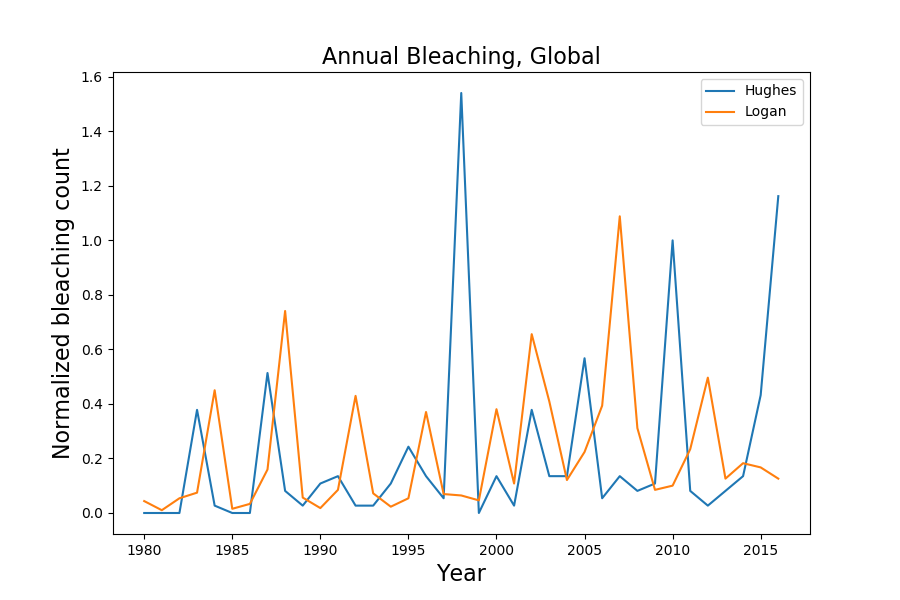

In [37]:
from coral_project_functions import bleach_annual_plot

# The annual bleaching count for the whole world, based on Logan et al. (2018) and Hughes et al. (2018)
# Values are normalized since the two datasets cover different areas.
plt.figure(figsize=[9, 6])
bleach_annual_plot(branching_bleach, massive_bleach, hughes, 'Annual Bleaching, Global')

#shiftYear = -1.5
#plt.plot(range(1980, 2017), hughes_norm, label='Hughes')
#plt.plot(shiftYear+np.array(range(1980, 2017)), cell_norm, label='Logan')
#plt.legend()

<IPython.core.display.Javascript object>


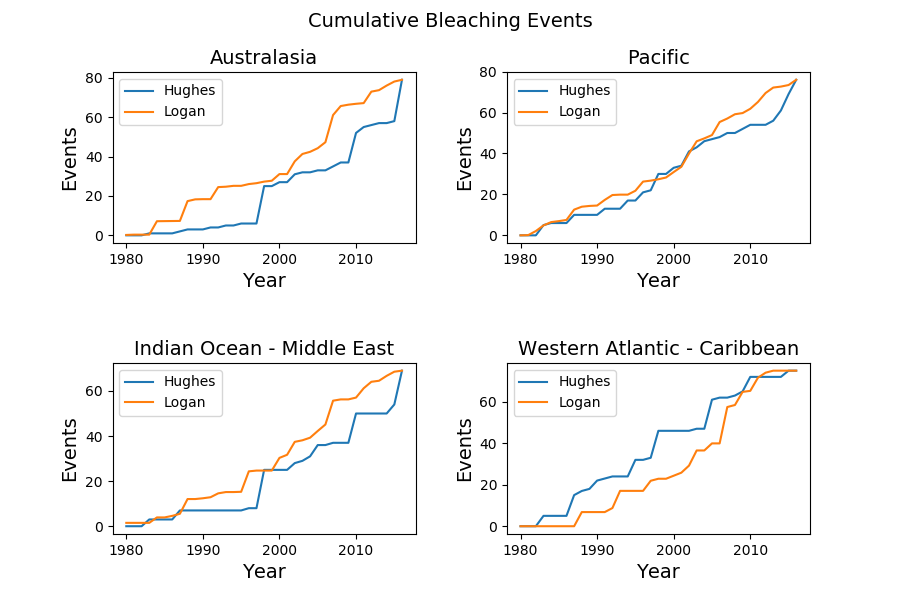

In [38]:
# Now do the same thing for each region separately.
plt.figure(figsize=[9, 6])
plt.suptitle("Cumulative Bleaching Events", fontsize=14)

plt.subplot(2,2,1)
c_idx = cells['Region'] == 'AuA'
h_idx = hughes['Region'] == 'AuA'
bleach_annual_plot(branching_bleach[c_idx], massive_bleach[c_idx], hughes[h_idx], 'Australasia', True)

plt.subplot(2,2,2)
c_idx = cells['Region'] == 'Pac'
h_idx = hughes['Region'] == 'Pac'
bleach_annual_plot(branching_bleach[c_idx], massive_bleach[c_idx], hughes[h_idx], 'Pacific', True)

plt.subplot(2,2,3)
c_idx = cells['Region'] == 'IO-ME'
h_idx = hughes['Region'] == 'IO-ME'
bleach_annual_plot(branching_bleach[c_idx], massive_bleach[c_idx], hughes[h_idx], 'Indian Ocean - Middle East', True)


plt.subplot(2,2,4)
c_idx = cells['Region'] == 'WAtl'
h_idx = hughes['Region'] == 'WAtl'
bleach_annual_plot(branching_bleach[c_idx], massive_bleach[c_idx], hughes[h_idx], 'Western Atlantic - Caribbean', True)

plt.subplots_adjust(hspace=0.7, wspace=0.3)


#### Interpretation of cumulative bleaching
1. The curves have been scaled to reach the same endpoint.  Only the rate of increase over time is of interest.
2. The model SST data matches the typical frequency of events such as El Nino, but not the exact timing, so the exact dates of jumps is not comparable.
3. This really should be repeated with actual historical temperatures, but I only fully appreciated that on May 7.  I have not yet obtained and interpolated the necessary data.

## Conclusions
This project did not show the correlations which were expected.  While perfect correlation between bleaching rates in the observational and modeled data were not expected, I did expect to see something.  In fact, there was no discernable match at the reef level.

The does seem to match the variability in bleaching, as can be seen in the Annual Bleaching figure, and there is some similarity of shape in the cumulative plot.

## Future Work
There is one immediate next step which should be done.  Because the SST history (Dunne et al. 2012) is model-based it simulates the frequency and magnitude of SST variations but not their actual timing.  Because of this, there can be no expectation of bleaching events occuring in specific years, even if overall trends are correct.  There are historical datasets available which use actual temperatures where possible, with missing locations and dates filled in using statistical methods.  The model should be re-run with one of these.  Then it should be possible to repeat the cumulative bleaching comparison and expect peak years to coincide if the model is correct.

To improve the usefulness of comparisons with the Hughes data, one useful step would be to obtain more complete definitions of the larger areas used in the paper.  Careful examination of the size and centroid locations of areas including the Great Barrier Reef shows that some of the areas must be quite elongated.  A shapefile or even a rough outline of each area would enable a better match between Hughes areas and Logan cells.  It would also be nice if Hughes, though currently limited to 100 areas, could add fill in just a few under-covered areas.  Two examples are the Atlantic coast of Brazil, where there is no coverage at all, and Micronesia, for example the Chuuk Lagoon area, where there is a high density of reefs with no close Hughes area.

Finally, it is important to remember that the Logan model is not meant to produce predictions for individual reefs.  Although this project has attempted to look for reef-level correlations, the Logan et al. data should always be presented with the footnote that there is not enough detail to capture reef-level variations.  This should not take away from the fact that the Logan model is useful for examining large-scale trends and differences between climate, evolution, or other scenarios.

<a id='refs'></a>
## References

Baskett, M. L., Gaines, S. D. & Nisbet, R. M. Symbiont diversity may help coral reefs survive moderate climate change. Ecol. Appl. 19, 3–17 (2009).

Donner, S. D., Rickbeil, G. J. M. & Heron, S. F. A new, high-resolution global mass coral bleaching database. PLoS One 12, e0175490 (2017).

Dunne, J. P., John, J. G., Adcroft, A. J., Griffies, S. M., Hallberg, R. W., Shevliakova, E., ... & Krasting, J. P. (2012). GFDL's ESM2 global coupled climate-carbon Earth System Models. Part I: Physical formulation and baseline simulation characteristics. Journal of Climate, 25(19), 6646-6665.

Frieler, K. et al. Limiting global warming to 2 °C is unlikely to save most coral reefs. Nat. Clim. Change 3, 165–170 (2013).

Hughes, T. P. et al. Spatial and temporal patterns of mass bleaching of corals in the Anthropocene. Science 359, 80–83 (2018).

Logan, C. A., Dunne, J. P., Ryan, J. S., Baskett, M. L. & Donner, S. D. Can symbiont diversity and evolution allow corals to keep pace with global warming and ocean acidification? prep (2018).

<a href='#intro'>back to Introduction</a>